In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [3]:
# create a dataframe to store results
mf_rbf_gpr_results = pd.DataFrame()
# use a for loop to read all csv files

input = pd.read_csv("exp_noise_doe_experiments_input.csv", index_col=0)
output = pd.read_csv("exp_noise_doe_experiments_output.csv", index_col=0)
# merge input and output dataframes
df = pd.merge(input, output, left_index=True, right_index=True)
mf_rbf_gpr_results = pd.concat([mf_rbf_gpr_results, df])

In [4]:
mf_rbf_gpr_results

,noise_std,num_hf,num_lf,problem,seed,mkg_normalized_mae,mkg_normalized_rmse,mkg_r2,mkg_mean_log_likelihood,mkf_lf_training_time,...,hk_learned_noise_std,sk_normalized_mae,sk_normalized_rmse,sk_r2,sk_mean_log_likelihood,sk_lf_training_time,sk_hf_training_time,sk_inference_time,sk_learned_noise_std,mkg_lf_training_time
0,0.3,10,200,Forrester_1b,10,0.377677,0.154895,0.991914,-0.814198,NaN,...,0.412408,0.364784,0.135657,0.993798,-0.743559,3.381535,0.223375,0.015845,0.000034,2.433258
1,0.3,15,200,Forrester_1b,10,0.381699,0.077470,0.997977,-0.425091,NaN,...,0.259961,0.212049,0.077747,0.997963,-0.457833,3.087203,0.425439,0.017525,0.251120,1.979526
2,0.3,20,200,Forrester_1b,10,0.355886,0.104508,0.996319,-0.535790,NaN,...,0.277745,0.264736,0.050446,0.999142,-0.434572,5.698506,0.713299,0.027979,0.308895,1.911428
3,0.3,25,200,Forrester_1b,10,0.160008,0.065445,0.998557,-0.378076,NaN,...,0.376069,0.242545,0.083648,0.997642,-0.547767,5.269167,0.786266,0.024865,0.386473,2.292854
4,0.3,30,200,Forrester_1b,10,0.627629,0.111187,0.995833,-0.542155,NaN,...,0.265536,0.262536,0.094069,0.997018,-0.466951,21.197994,1.319171,0.047381,0.248159,2.444480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.3,30,200,Forrester_1b,51,0.338812,0.096183,0.996882,-0.477066,NaN,...,0.349772,0.184303,0.075532,0.998077,-0.423889,4.257126,0.630331,0.019743,0.297320,3.510851
86,0.3,35,200,Forrester_1b,51,0.424049,0.083288,0.997662,-0.445985,NaN,...,0.267496,0.455009,0.078520,0.997922,-0.410527,4.295629,0.733902,0.021885,0.266095,3.574428
87,0.3,40,200,Forrester_1b,51,0.248688,0.106189,0.996200,-0.494459,NaN,...,0.317098,0.158089,0.056767,0.998914,-0.401011,4.185646,1.480557,0.020797,0.316706,4.331927
88,0.3,45,200,Forrester_1b,51,0.097614,0.048107,0.999220,-0.295170,NaN,...,0.319177,0.284554,0.058557,0.998844,-0.392774,4.096229,0.985308,0.021717,0.285607,2.699940


<Axes: xlabel='num_hf', ylabel='mkg_learned_noise_std'>

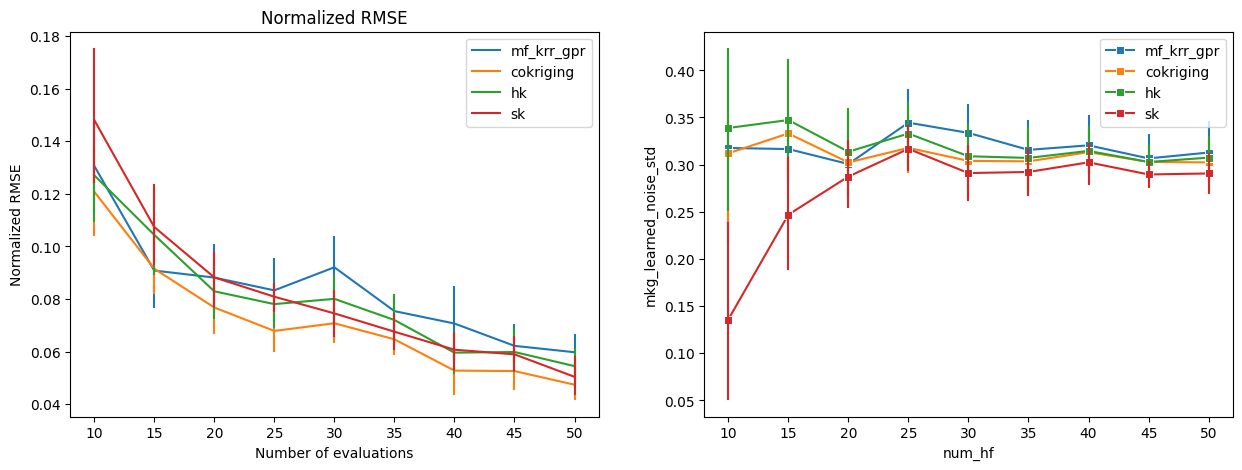

In [5]:
# plot the results of the mf_rbf_lf_200 and gpr_rbf_booth experiments using number of evaluations as x and normalized rmse and log likelihood as y
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    y="mkg_normalized_rmse",
    err_style="bars",
    ax=ax[0],
    label="mf_krr_gpr",
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    y="ck_normalized_rmse",
    ax=ax[0],
    label="cokriging",
    err_style="bars",
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    y="hk_normalized_rmse",
    ax=ax[0],
    label="hk",
    err_style="bars",
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    y="sk_normalized_rmse",
    err_style="bars",
    ax=ax[0],
    label="sk",
)
# ax[0].set_xlim(10, 30)
# ax[0].set_ylim(0, 0.25)
ax[0].set_title("Normalized RMSE")
ax[0].set_xlabel("Number of evaluations")
ax[0].set_ylabel("Normalized RMSE")
ax[0].legend()
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    y="mkg_learned_noise_std",
    marker="s",
    legend="full",
    ax=ax[1],
    label="mf_krr_gpr",
    err_style="bars",
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    y="ck_learned_noise_std",
    marker="s",
    legend="full",
    ax=ax[1],
    label="cokriging",
    err_style="bars",
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    y="hk_learned_noise_std",
    marker="s",
    legend="full",
    ax=ax[1],
    label="hk",
    err_style="bars",
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    y="sk_learned_noise_std",
    marker="s",
    legend="full",
    ax=ax[1],
    label="sk",
    err_style="bars",
)
# ax[1].set_xlim(10, 30)
# ax[1].set_title("Log Likelihood")

ValueError: Could not interpret value `mf_normalized_rmse` for `y`. An entry with this name does not appear in `data`.

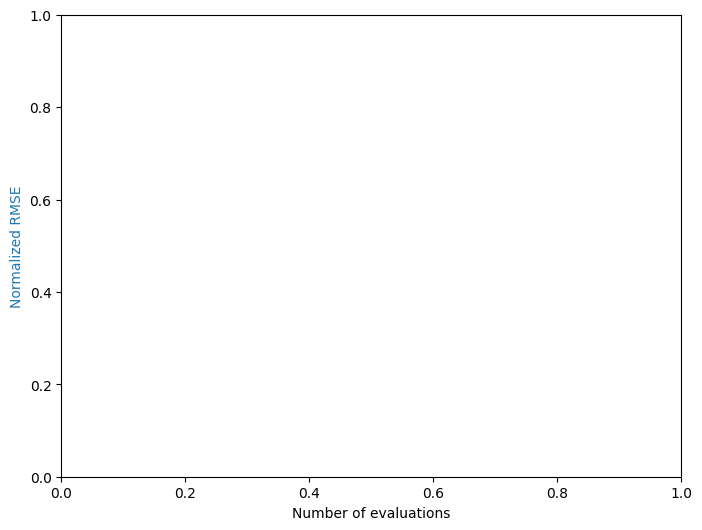

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot normalized RMSE on the left y-axis
color = "tab:blue"
ax1.set_xlabel("Number of evaluations")
ax1.set_ylabel("Normalized RMSE", color=color)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    palette="colorblind",
    marker="^",
    legend="full",
    linewidth=2,
    y="mf_normalized_rmse",
    hue="noise_std",
    ax=ax1,
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    linestyle="dashed",
    y="sf_normalized_rmse",
    ax=ax1,
)
ax1.tick_params(axis="y", labelcolor=color)

ax1.get_legend().remove()

# Create another y-axis for log likelihood
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Log Likelihood", color=color)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="^",
    legend="full",
    y="mf_mean_log_likelihood",
    ax=ax2,
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    linestyle="dashed",
    y="sf_mean_log_likelihood",
    ax=ax2,
)
ax2.tick_params(axis="y", labelcolor=color)
ax2.get_legend().remove()
# set the legend scale of the right y-axis into log scale
# ax2.set_yscale('log')

# add legend

plt.show()

In [ ]:
# problem information
problem_sets = [
    "Bohachevsky",
    "Booth",
    "Borehole",
    "CurrinExp",
    "Hartman3",
    "Hartman6",
    "Park91A",
    "Park91B",
    "Sixhump",
]
dimensions = [2, 2, 8, 2, 3, 6, 4, 4, 2]
r2 = [0.857, 0.925, 1.000, 0.997, -0.196, 0.712, 0.994, 1.0000, 0.833]

# # set r2 to have 3 decimal places
# r2 = [round(i, 3) for i in r2]
# print(r2)

In [ ]:
problem_set = mf_rbf_gpr_results["problem"].unique()

font_size = 14
fig, ax = plt.subplots(3, 3, figsize=(16, 9))
# for problem in problem_set:

for ii in range(3):
    for jj in range(3):
        problem = problem_set[ii * 3 + jj]
        result = mf_rbf_gpr_results[(mf_rbf_gpr_results["problem"] == problem)]
        # Plot normalized RMSE on the left y-axis
        color = "tab:blue"
        if ii == 2:
            ax[ii, jj].set_xlabel(
                "number of HF samples (d)", fontsize=font_size)
        else:
            ax[ii, jj].set_xlabel(" ")
        if jj == 0:
            ax[ii, jj].set_ylabel("NRMSE", color=color)
        else:
            ax[ii, jj].set_ylabel(" ", color=color)
        sns.lineplot(
            data=result,
            x="num_hf",
            palette="colorblind",
            marker="^",
            legend="full",
            linewidth=2,
            y="mf_normalized_rmse",
            hue="noise_std",
            ax=ax[ii, jj],
            err_style="bars",
        )
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="s",
            legend="full",
            linewidth=2,
            linestyle="dashed",
            y="sf_normalized_rmse",
            ax=ax[ii, jj],
            err_style="bars",
        )
        ax[ii, jj].tick_params(axis="y", labelcolor=color)
        ax[ii, jj].get_legend().remove()
        # Create another y-axis for log likelihood
        ax2 = ax[ii, jj].twinx()
        color = "tab:red"
        if jj == 2:
            ax2.set_ylabel("Log Likelihood", color=color, fontsize=font_size)
        else:
            ax2.set_ylabel(" ", color=color)
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="^",
            legend="full",
            linewidth=2,
            y="mf_mean_log_likelihood",
            err_style="bars",
            ax=ax2,
        )
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="s",
            legend="full",
            linestyle="dashed",
            linewidth=2,
            err_style="bars",
            y="sf_mean_log_likelihood",
            ax=ax2,
        )
        ax2.tick_params(axis="y", labelcolor=color)
        # remove the legend of ax2
        if ii == 2 and jj == 2:
            ax2.legend(fontsize=12)
        else:
            ax2.get_legend().remove()

        # set the font of axis and y-axis precision
        ax[ii, jj].tick_params(axis="both", which="major", labelsize=font_size)
        ax2.tick_params(axis="both", which="major", labelsize=font_size)
        # set the line width of the axis
        for axis in ["top", "bottom", "left", "right"]:
            ax[ii, jj].spines[axis].set_linewidth(1.5)
        ax2.spines["right"].set_linewidth(1.5)
        # get title info
        title = (
            problem_sets[ii * 3 + jj]
            + " (d="
            + str(dimensions[ii * 3 + jj])
            + ", r="
            + str(r2[ii * 3 + jj])
            + ")"
        )
        ax[ii, jj].set_title(title)
        # set space between subplots
        plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.savefig("gpr_comparison_at_200lf_samples.png",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.pdf",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.svg",
            dpi=300, bbox_inches="tight")
plt.show()